Lab Experiment 6: Implementation and Comparison of Ensemble Learning Techniques (Random Forest, AdaBoost, and XGBoost)


Logistic Regression Accuracy: 0.8370
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        75
           1       0.88      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



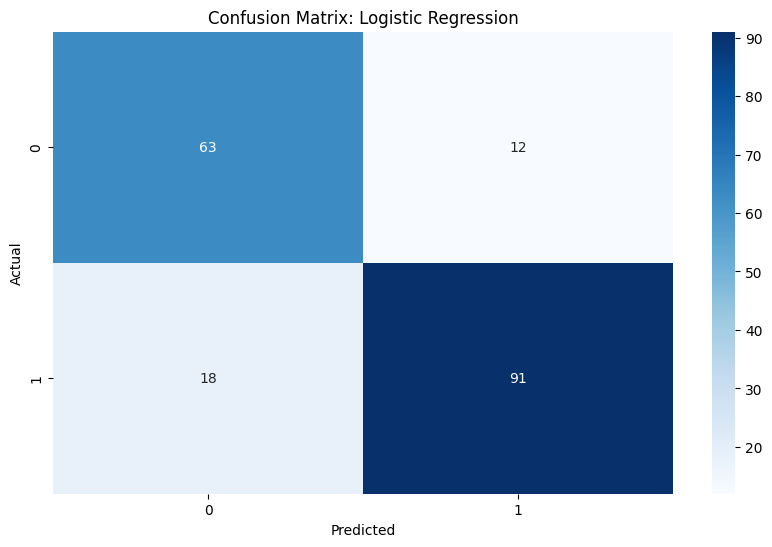


Decision Tree Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        75
           1       0.81      0.75      0.78       109

    accuracy                           0.75       184
   macro avg       0.74      0.75      0.74       184
weighted avg       0.76      0.75      0.75       184



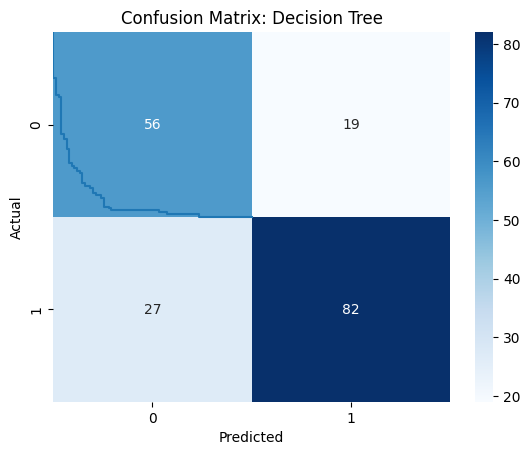


Random Forest Accuracy: 0.8641
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        75
           1       0.90      0.86      0.88       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



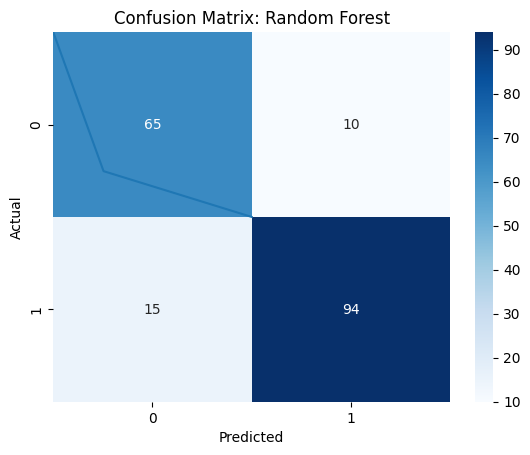

c:\Users\Ansh\test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        75
           1       0.85      0.81      0.83       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184



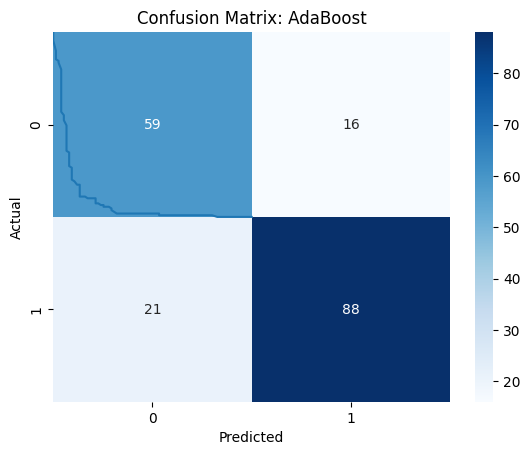

c:\Users\Ansh\test\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:37:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.8315
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        75
           1       0.91      0.80      0.85       109

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



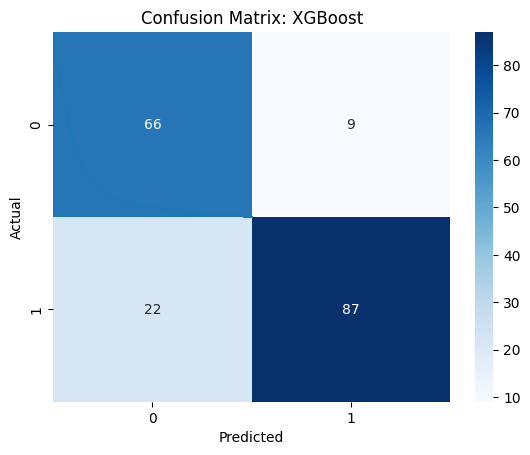

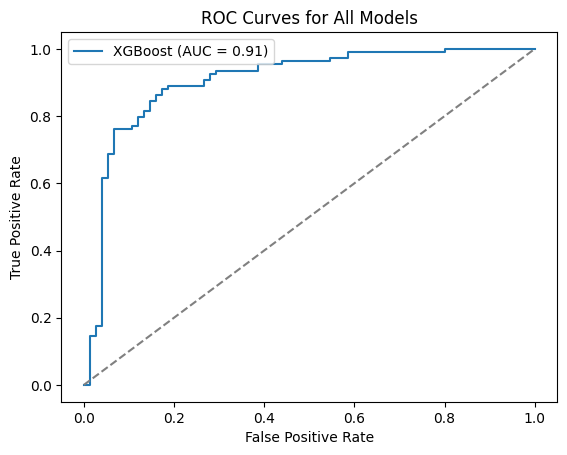


Final Model Comparison:
Logistic Regression: 0.8370
Decision Tree: 0.7500
Random Forest: 0.8641
AdaBoost: 0.7989
XGBoost: 0.8315


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Drop any unnecessary columns (adjust based on dataset content)
df.drop(columns=['id'], inplace=True, errors='ignore')

# Separate features and target
X = df.drop(columns=['num'])  # Features
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Convert target to binary classification

# Convert categorical features to numerical
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical data

# Handle missing values
imputer = SimpleImputer(strategy="mean")  # Fill missing values with mean
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
results = {}
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
    
    # ROC Curve
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

# Final Model Comparison
print("\nFinal Model Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")
